In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

% %matplotlib inline
import matplotlib.image as mpimg

import tool.colormaps as cmaps

plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.register_cmap(name='inferno', cmap=cmaps.inferno)
plt.register_cmap(name='magma', cmap=cmaps.magma)
plt.set_cmap(cmaps.inferno);



In [17]:

snum = 10
fftsize = 200

def save_specturm(filename, df):
    """save data from df as a black/white image in filename"""
    d = np.zeros(len(df))
    fig = plt.figure(figsize=(2,1))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_ylim(0,1)
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.fill_between(df.freq, df.power, where=df.power>=d, interpolate=True, color='black')
    fig.savefig(filename)
    plt.close(fig)
    

for i in range(snum):
    df = pd.DataFrame(data = {'power':np.random.random(fftsize)*np.random.random(), 'freq' :np.arange(fftsize)})
    save_specturm('/tmp/{}.png'.format(i), df)


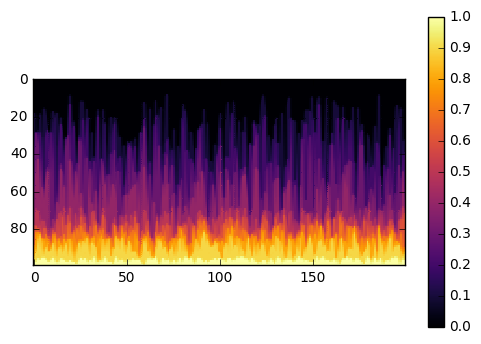

In [18]:
acc = mpimg.imread('/tmp/{}.png'.format(0))
for i in range(1,snum):

    acc = acc + mpimg.imread('/tmp/{}.png'.format(i))

acc = acc/snum

plt.set_cmap(cmaps.inferno);
acc = acc[:,:,0]
#acc = np.flipud(acc)
acc = 1 - acc
plt.pcolormesh(acc)
plt.colorbar()
plt.imshow(acc)
mpimg.imsave('/tmp/out.png', acc)

NameError: name 'pd' is not defined